In [1]:
import scipy
import tensorflow as tf
from tensorflow import keras

In [2]:
base_model = keras.applications.resnet.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
print(base_model.summary())



Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                     

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

data_path = 'data/horse_photos'
img_size = (227, 227)

dataset = image_dataset_from_directory(
    data_path,
    image_size=img_size,
    batch_size=32 
)

for images, labels in dataset.take(1):
    print(images.shape, labels.shape)

Found 1897 files belonging to 5 classes.
(32, 227, 227, 3) (32,)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create AlexNet model
model = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    # Add other layers according to AlexNet architecture
    # ...
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(1000, activation='softmax')  # Output layer for ImageNet with 1000 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
num_epochs = 2
hist = model.fit(dataset, epochs=num_epochs)

Epoch 1/2




14/60 [======>.......................] - ETA: 2:01 - loss: 606.4833 - accuracy: 0.1719

KeyboardInterrupt: 

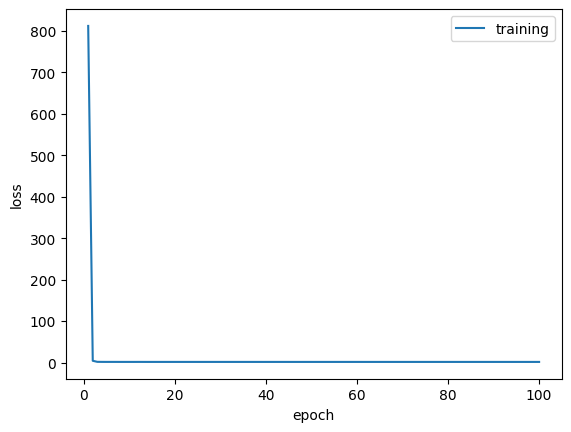

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = hist.history["loss"]
#validation_loss = hist.history["val"]
plt.plot(epoch_nums, training_loss)
#plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [ ]:
modelFileName = 'models/horses_AlexNet.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/horses_AlexNet.h5


In [ ]:
import os
import numpy as np
import tensorflow
from  tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input



# 1. Load your trained Keras model

model = keras.models.load_model('models/horses2.h5')



# 2. Load and preprocess the images from the folder
image_folder = './inferencing'
image_files = os.listdir(image_folder)



# Set image size to match your model's input shape
img_width, img_height = 224, 224



# Preprocess images and store them in a list
preprocessed_images = []
for img_file in image_files:
    img_path = os.path.join(image_folder, img_file)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array)
    preprocessed_images.append(img_preprocessed)



# 3. Perform inference on the preprocessed images
predictions = [model.predict(img) for img in preprocessed_images]


classnames = os.listdir(os.path.join('data', 'Horse_photos'))
classnames.sort()

# Use the classifier to predict the class
#class_idx = predict_image(model, img)
#print (classnames[class_idx])
# 4. (Optional) Save or display the results
# Here, we simply print the predictions for each image
for i, img_file in enumerate(image_files):
    index = int(np.argmax(predictions[i], axis=1)[0])
    print(f"Prediction for {img_file}: {predictions[i]} Class:{classnames[index]}")

1/1 [==============================] - 0s 80ms/step
Prediction for ABC1.jpg: [[1.0000000e+00 6.5905021e-19 5.3392527e-25 3.3357706e-16 4.5940137e-29]] Class:AmericanBashkirCurly
Prediction for ABC2.jpg: [[9.9894911e-01 1.0508894e-03 0.0000000e+00 3.6368352e-12 6.9833658e-33]] Class:AmericanBashkirCurly
Prediction for AP1.jpg: [[0.000000e+00 1.000000e+00 0.000000e+00 2.502376e-29 0.000000e+00]] Class:AmericanPaintHorse
Prediction for AP2.jpg: [[6.2647498e-11 1.3313021e-09 8.0370665e-28 5.0884057e-05 9.9994910e-01]] Class:ShetlandPony
Prediction for BD1.jpg: [[1.5182936e-23 1.0000000e+00 3.3875287e-37 3.9425823e-26 3.6420654e-19]] Class:AmericanPaintHorse
Prediction for BD2.jpg: [[1.0000000e+00 1.1278470e-10 4.2381782e-38 4.3653816e-22 2.3636322e-14]] Class:AmericanBashkirCurly
Prediction for Friesian1.jpg: [[1.4241179e-09 9.5945871e-01 0.0000000e+00 8.3614572e-25 4.0541332e-02]] Class:AmericanPaintHorse
Prediction for Friesian2.jpg: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 2.3094799e